# Day 08. Exercise 01
# Binary classifier. SVM. Decision tree

## 0. Imports

In [718]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree

## 1. Preprocessing and logreg visualization

Считайте файл `am_pm.csv` в датафрейм из предыдущего упражнения.

1. Постройте график, где по оси X отложены`am`, по оси Y — `pm`, точками обозначены дни, а цвет зависит от цели.
2. Добавьте на график границу принятия решения логистической регрессии.
3. Постройте тот же график (с границей), но на этот раз цвет должен зависеть от прогнозов.

Теперь вам должно быть понятно, как работает логистическая регрессия.

In [719]:
df = pd.read_csv('../data/am_pm.csv')
# df

In [720]:
# Обучим модель, как в ex00
x = df[['am', 'pm']] #признаки (am и pm)
y = df['target'] #целевая переменная (target)
model = LogisticRegression(random_state=21, fit_intercept=False)
model.fit(x, y)

LogisticRegression(fit_intercept=False, random_state=21)

## Граница принятия решения
### В логистической регрессии — это линейная гиперплоскость, которая разделяет два класса. Мы будем рассматривать двумерный случай, т.к. имеем два признака am и pm, это будет прямая линия, определяеммая уравнением: w1*am + w2*pm + b = 0
### w1, w2 - веса модели(коэффициенты), b - свободный член уравнения(intercept), в нашем случае по заданию он равен 0 (fit_intercept=False)

In [721]:
w1, w2 = model.coef_[0]
b = model.intercept_[0]
print("w1 = ", w1)
print("w2 = ", w2)
print("b = ", b)

w1 =  0.0003865266152770991
w2 =  -0.0029806573907424166
b =  0.0


## Графики

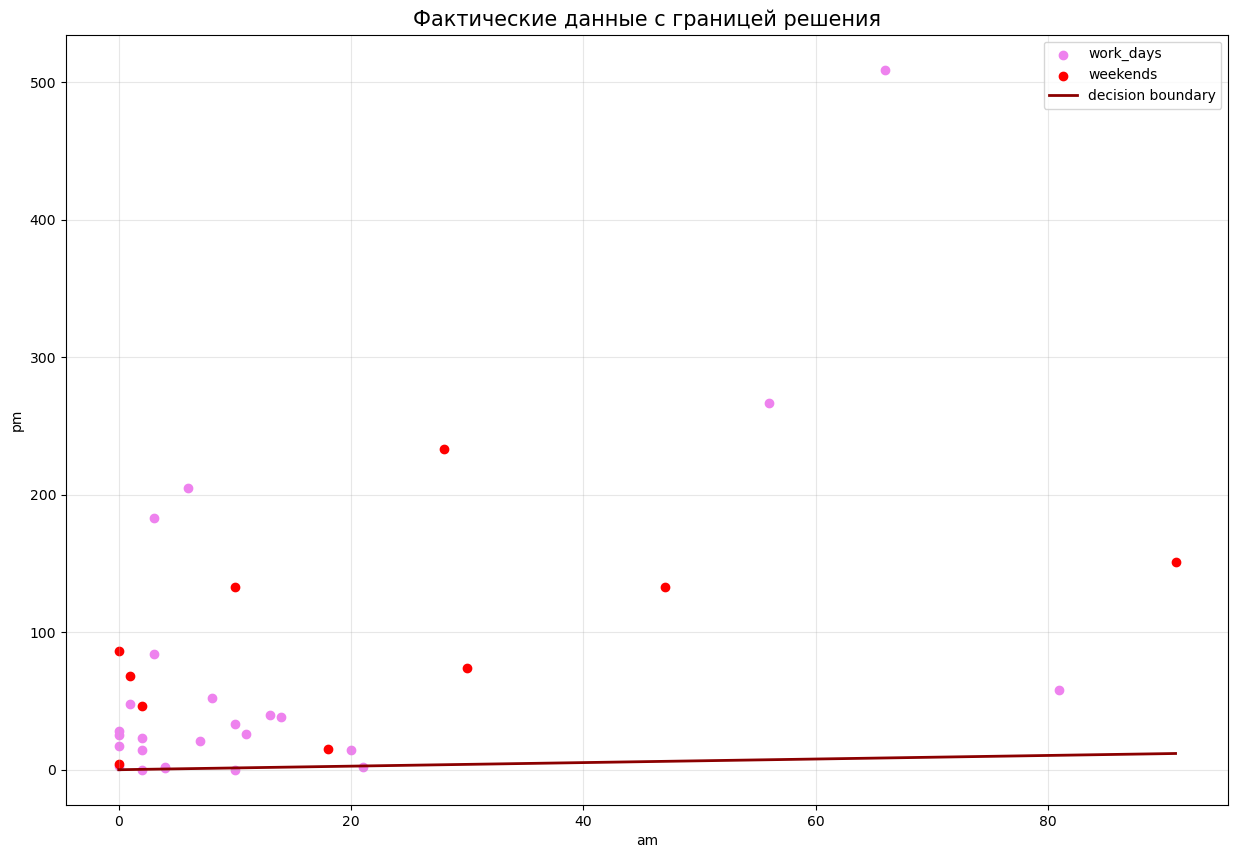

In [722]:
#Распределение коммитов по времени суток (фактические данные)
plt.figure(figsize=(15, 10))

work_days = df[df['target'] == 0]
weekends = df[df['target'] == 1]

plt.scatter(work_days['am'], work_days['pm'], color='violet', label='work_days')
plt.scatter(weekends['am'], weekends['pm'], color='red', label='weekends')

am_values = np.linspace(df['am'].min(), df['am'].max(), 100)

pm_boundary = -(w1 * am_values + b) / w2

plt.plot(am_values, pm_boundary, color='darkred', linestyle='-', linewidth=2, label='decision boundary')

plt.xlabel('am')
plt.ylabel('pm')
plt.title('Фактические данные с границей решения', fontsize = 15)
plt.grid(True, alpha=0.3)
plt.legend()

plt.show()

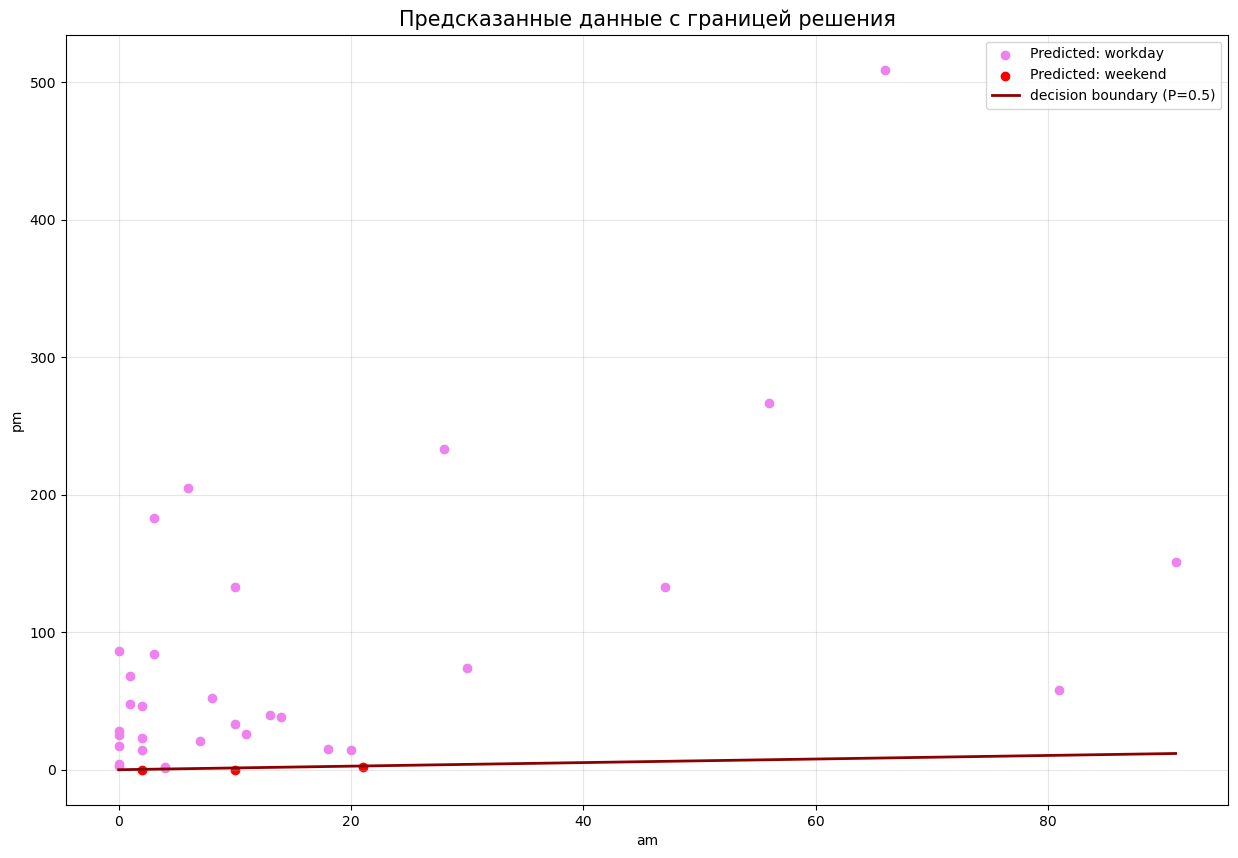

In [723]:
#Предсказание типа дня по коммитам (прогнозируемые данные)
plt.figure(figsize=(15, 10))
pred_work = df[df['predict'] == 0]
pred_weekend = df[df['predict'] == 1]

plt.scatter(pred_work['am'], pred_work['pm'], color='violet', label='Predicted: workday')
plt.scatter(pred_weekend['am'], pred_weekend['pm'], color='red', label='Predicted: weekend')

am_values = np.linspace(df['am'].min(), df['am'].max(), 100)

pm_boundary = -(w1 * am_values + b) / w2

plt.plot(am_values, pm_boundary, color='darkred', linestyle='-', linewidth=2, label='decision boundary (P=0.5)')

plt.xlabel('am')
plt.ylabel('pm')

plt.title('Предсказанные данные с границей решения', fontsize = 15)
plt.grid(True, alpha=0.3)
plt.legend()

plt.show()

#### *цвета точек по прогнозу - означает, что цвет каждой точки определяется не реальным значением (target), а тем, что предсказала модель (predict)

## 2. Standardizing and logreg

Линейные модели могут быть чувствительны к масштабу ваших переменных. Масштабирование признаков облегчает для них поиск оптимального решения.

1. Примените `StandardScaler` к `X` и снова обучите логистическую регрессию с теми же параметрами.
2. Рассчитайте `точность` для новой модели. Стала ли она лучше, чем наивный классификатор с наиболее популярным классом?
3. Нарисуйте графики, описанные выше, но для новой модели.

## Масштабирование признаков
### Масштабирование признаков — это процесс преобразования числовых признаков (фичей) в модели машинного обучения, чтобы они находились в едином диапазоне значений. 
### StandardScaler (стандартизация) Преобразует данные так, чтобы их среднее было 0, а стандартное отклонение — 1:
$$
x_{\text{scaled}} = \frac{x - \mu}{\sigma}
$$

Где:
- $x$ — исходное значение признака
- $\mu$ — среднее значение признака (вычисляется как $\mu = \frac{1}{n}\sum_{i=1}^n x_i$)
- $\sigma$ — стандартное отклонение признака (вычисляется как $\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n (x_i - \mu)^2}$)
- $x_{\text{scaled}}$ — стандартизированное значение

In [724]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [725]:
# Обучение модели
model_scaled = LogisticRegression(random_state=21, fit_intercept=False)
model_scaled.fit(x_scaled, y)

LogisticRegression(fit_intercept=False, random_state=21)

## Оценка точности для новой модели

In [726]:
# Предсказания
df['predict_scaled'] = model_scaled.predict(x_scaled)

accuracy_scaled = accuracy_score(y, df['predict_scaled'])
print(f'Точность после масштабирования: {accuracy_scaled}')

Точность после масштабирования: 0.7428571428571429


## Стала ли она лучше, чем наивный классификатор с наиболее популярным классом?

In [727]:
naive_pred = [0] * len(df)
naive_accuracy = accuracy_score(y, naive_pred)
print(f'Точность наивного прогноза: {naive_accuracy}')

Точность наивного прогноза: 0.7142857142857143


## Ответ: да
### Новая модель превзошла наивный классификатор на: 0.7429 - 0.7143 = 0.0286 (2.86%)
### Это означает, что масштабирование признаков дало улучшение точности, хоть и небольшое

## Графики для новой модели

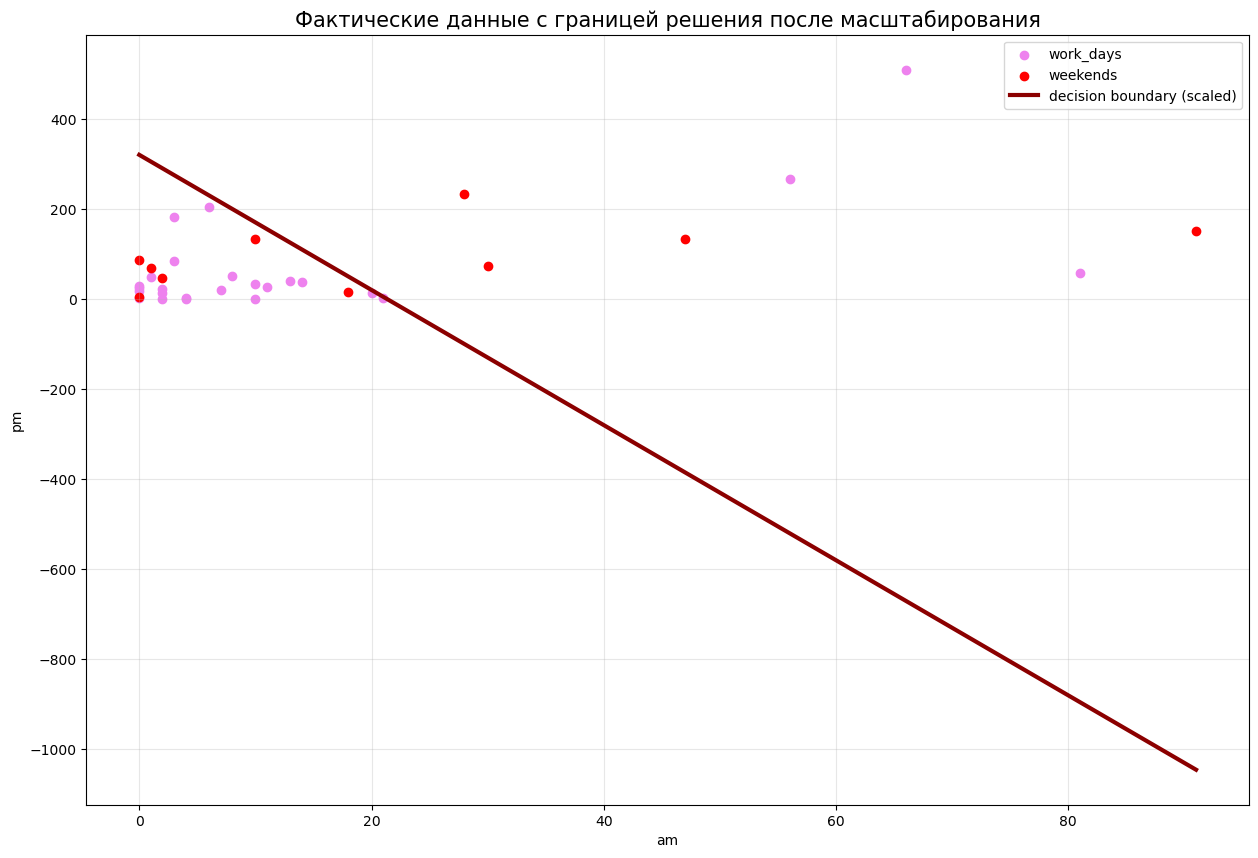

In [728]:
plt.figure(figsize=(15, 10))

work_days = df[df['target'] == 0]
weekends = df[df['target'] == 1]

plt.scatter(work_days['am'], work_days['pm'], color='violet', label='work_days')
plt.scatter(weekends['am'], weekends['pm'], color='red', label='weekends')

w1, w2 = model_scaled.coef_[0]
b = model_scaled.intercept_[0]

# Параметры масштабирования
mean_am, mean_pm = scaler.mean_[0], scaler.mean_[1]
std_am, std_pm = scaler.scale_[0], scaler.scale_[1]

x_min, x_max = df['am'].min(), df['am'].max()
y_min, y_max = df['pm'].min(), df['pm'].max()

am_values = np.array([x_min, x_max])

# Уравнение границы в исходных координатах
pm_boundary = ((-w1/std_am) * (am_values - mean_am) - b) / (w2/std_pm) + mean_pm

plt.plot(am_values, pm_boundary, 
         color='darkred', 
         linestyle='-', 
         linewidth=3,
         label='decision boundary (scaled)')

plt.xlabel('am')
plt.ylabel('pm')
plt.title('Фактические данные с границей решения после масштабирования', fontsize=15)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

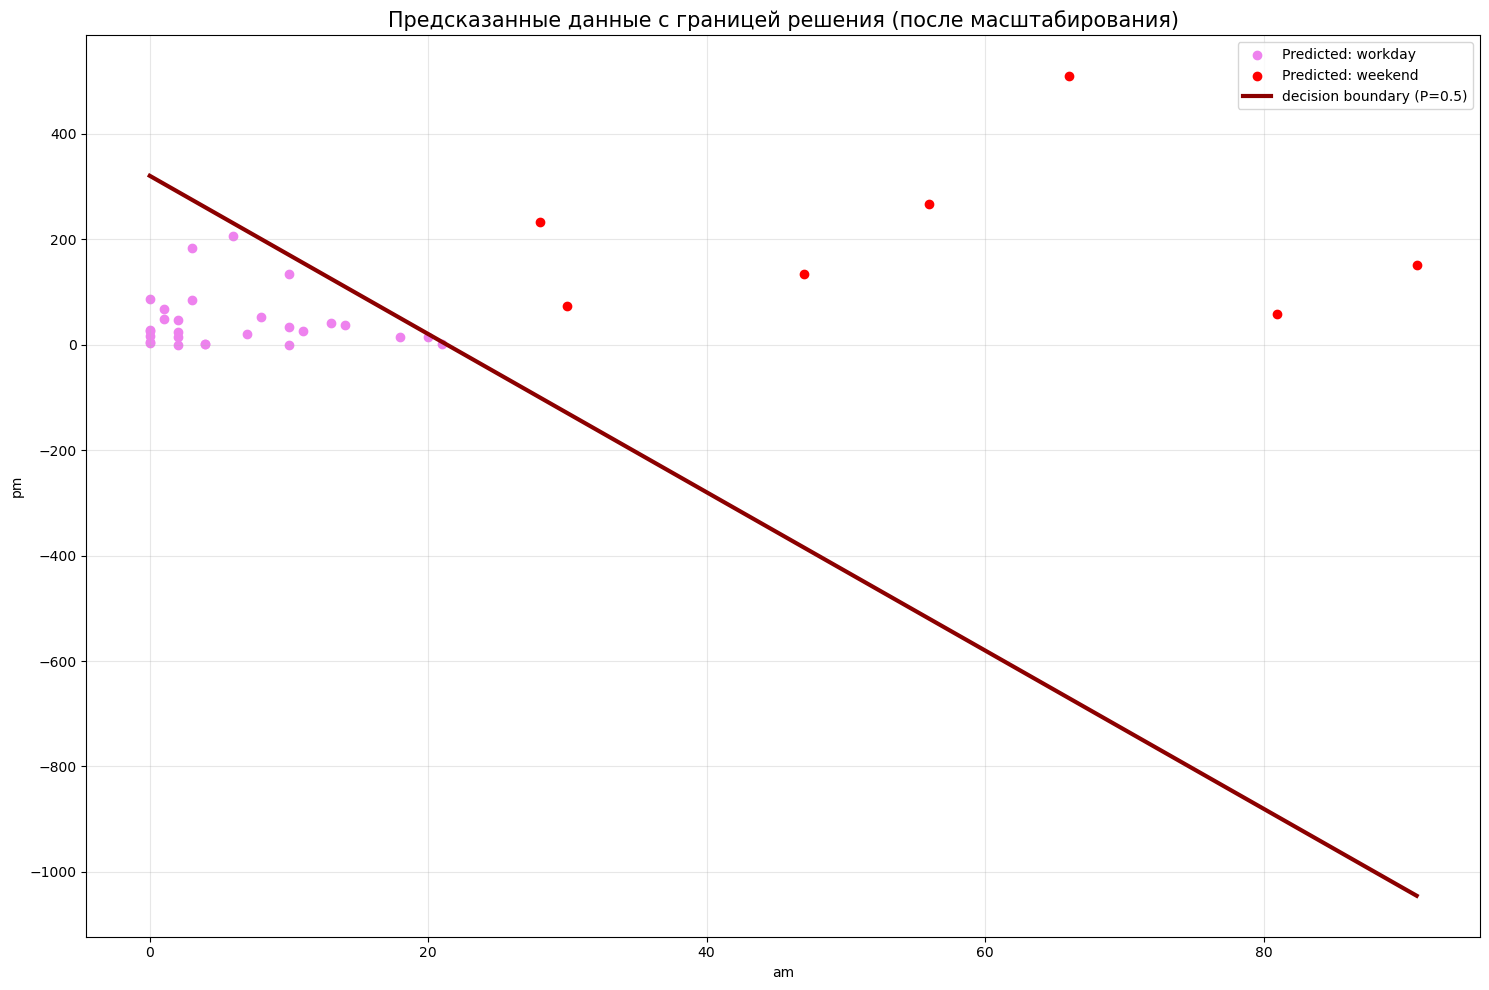

In [729]:
plt.figure(figsize=(15, 10))

pred_work = df[df['predict_scaled'] == 0]
pred_weekend = df[df['predict_scaled'] == 1]

plt.scatter(pred_work['am'], pred_work['pm'], color='violet', label='Predicted: workday')
plt.scatter(pred_weekend['am'], pred_weekend['pm'], color='red', label='Predicted: weekend')

w1, w2 = model_scaled.coef_[0]
b = model_scaled.intercept_[0]

# Параметры масштабирования
mean_am, mean_pm = scaler.mean_[0], scaler.mean_[1]
std_am, std_pm = scaler.scale_[0], scaler.scale_[1]

am_values = np.array([df['am'].min(), df['am'].max()])

pm_boundary = ((-w1/std_am)*(am_values - mean_am) - b)/(w2/std_pm) + mean_pm

plt.plot(am_values, pm_boundary, 
         color='darkred', 
         linestyle='-', 
         linewidth=3,
         label='decision boundary (P=0.5)')

plt.xlabel('am')
plt.ylabel('pm')
plt.title('Предсказанные данные с границей решения (после масштабирования)', fontsize=15)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()

plt.show()

## 3. SVM (Метод опорных векторов)

1. Примените модель `SVC` к масштабированному фрейму данных, используя параметры `probability=True`, `random_state=21`.
2. Рассчитайте `точность`.
3. Попробуйте разные ядра и найдите лучшее с точки зрения точности.
4. Снова постройте оба графика с границей принятия решений, чтобы увидеть, как работает этот алгоритм.

## Обучение SVC модели
### SVM (Support Vector Machine, Метод опорных векторов) — это мощный алгоритм машинного обучения для задач классификации и регрессии. Его ключевая идея — найти оптимальную границу (гиперплоскость), которая разделяет данные разных классов с максимальным запасом.
### SVC — это конкретная реализация SVM в scikit-learn, предназначенная только для классификации.

In [730]:
svc_model = SVC(probability=True, random_state=21)

svc_model.fit(x_scaled, y)

SVC(probability=True, random_state=21)

## Оценка точности

In [731]:
# Предсказания модели
y_pred = svc_model.predict(x_scaled)
y_true = y

accuracy_rbf = accuracy_score(y_true, y_pred)
print(f'Точность (rbf): {accuracy_rbf}')

Точность (rbf): 0.7428571428571429


## Графики для SVC

c:\Users\Anna\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


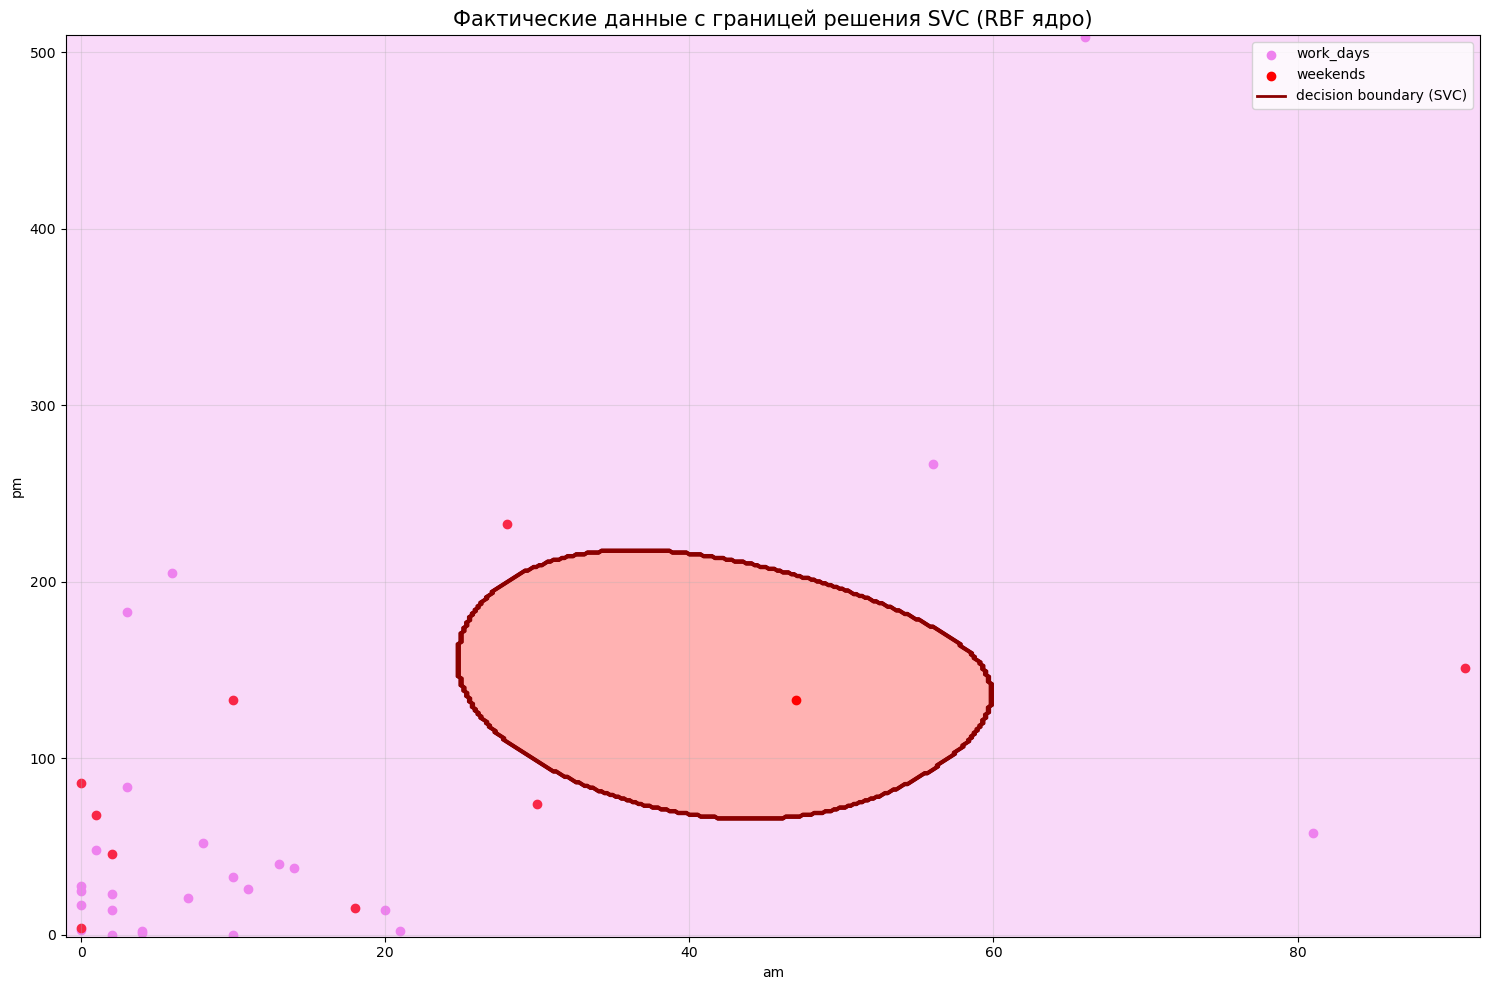

In [732]:
plt.figure(figsize=(15, 10))

work_days = df[df['target'] == 0]
weekends = df[df['target'] == 1]

plt.scatter(work_days['am'], work_days['pm'], color='violet', label='work_days')
plt.scatter(weekends['am'], weekends['pm'], color='red', label='weekends')

# Создаем сетку для построения границы решения
x_min, x_max = df['am'].min() - 1, df['am'].max() + 1
y_min, y_max = df['pm'].min() - 1, df['pm'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Масштабируем сетку
mesh_points = np.c_[xx.ravel(), yy.ravel()]
mesh_points_scaled = scaler.transform(mesh_points)

# Предсказываем для каждой точки сетки
z = svc_model.predict(mesh_points_scaled)
z = z.reshape(xx.shape)

# Рисуем контур границы решения
plt.contourf(xx, yy, z, alpha=0.3, levels=[0, 0.5, 1], colors=['violet', 'red'])
plt.contour(xx, yy, z, colors='darkred', linewidths=2, linestyles='solid')

plt.xlabel('am')
plt.ylabel('pm')
plt.title('Фактические данные с границей решения SVC (RBF ядро)', fontsize=15)
plt.grid(True, alpha=0.3)
plt.plot([], [], color='darkred', linestyle='-', linewidth=2, label='decision boundary (SVC)')
plt.legend()
plt.tight_layout()
plt.show()

c:\Users\Anna\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


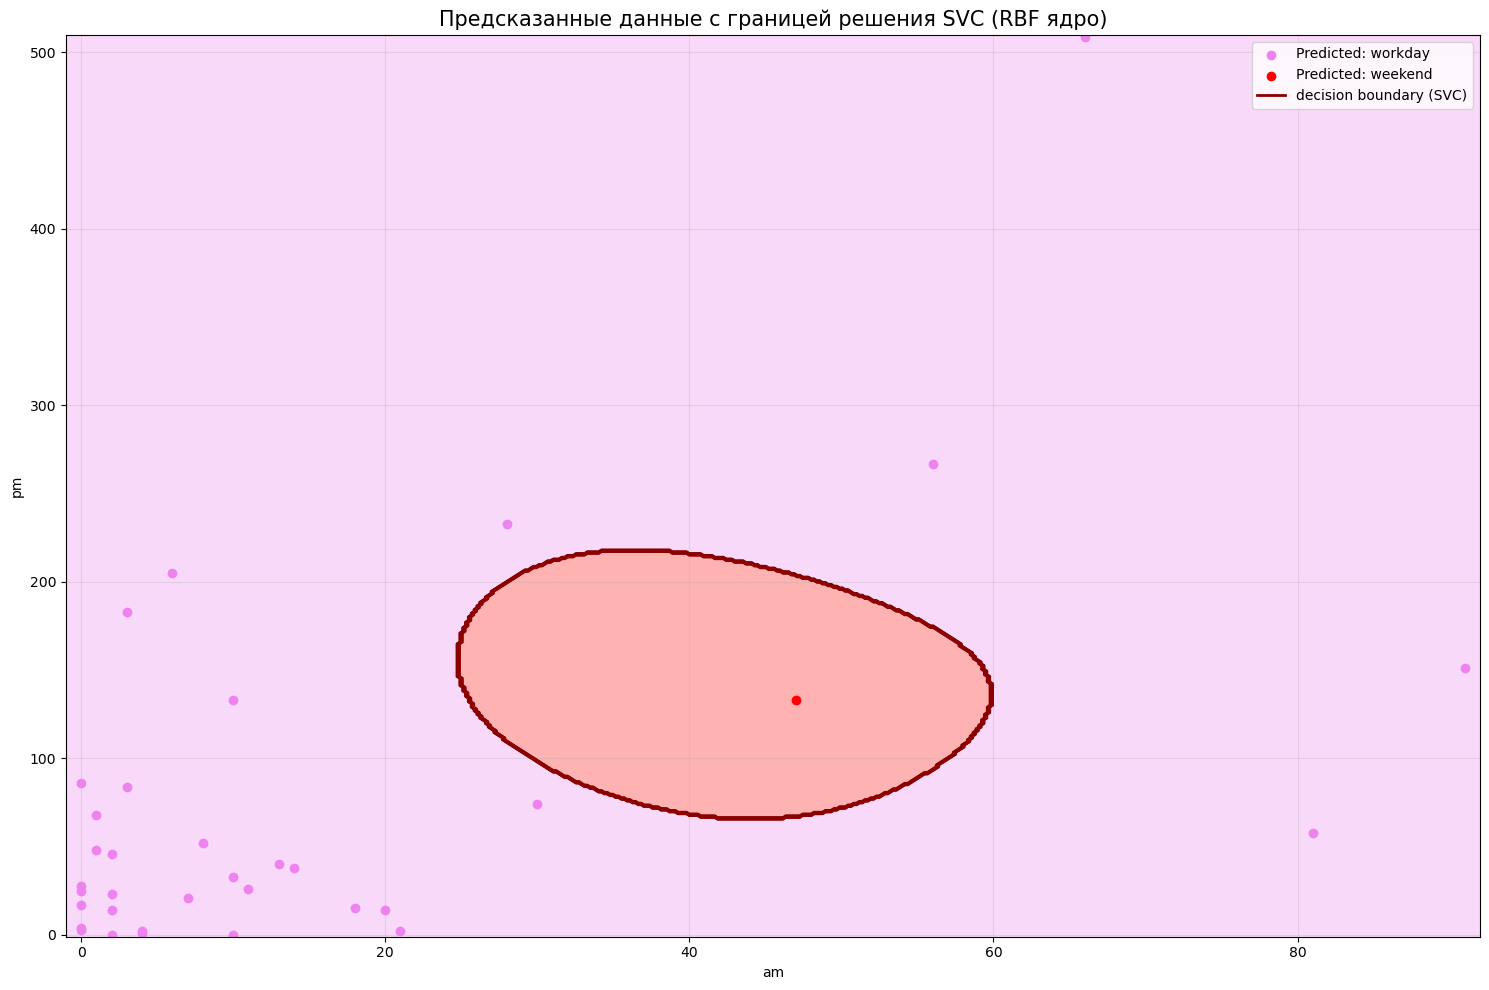

In [733]:
plt.figure(figsize=(15, 10))

df['y_pred'] = y_pred
pred_work = df[df['y_pred'] == 0]
pred_weekend = df[df['y_pred'] == 1]

plt.scatter(pred_work['am'], pred_work['pm'], color='violet', label='Predicted: workday')
plt.scatter(pred_weekend['am'], pred_weekend['pm'], color='red', label='Predicted: weekend')

x_min, x_max = df['am'].min() - 1, df['am'].max() + 1
y_min, y_max = df['pm'].min() - 1, df['pm'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

mesh_points = np.c_[xx.ravel(), yy.ravel()]
mesh_points_scaled = scaler.transform(mesh_points)

plt.contourf(xx, yy, z, alpha=0.3, levels=[0, 0.5, 1], colors=['violet', 'red'])
plt.contour(xx, yy, z, colors='darkred', linewidths=2, linestyles='solid')

plt.xlabel('am')
plt.ylabel('pm')
plt.title('Предсказанные данные с границей решения SVC (RBF ядро)', fontsize=15)
plt.grid(True, alpha=0.3)
plt.plot([], [], color='darkred', linestyle='-', linewidth=2, label='decision boundary (SVC)')
plt.legend()
plt.tight_layout()
plt.show()

## Тестирование на разных ядрах
### Что такое ядро (kernel) в SVC?
В модели SVC ядро — это математическая функция, которая преобразует исходные данные в пространство более высокой размерности, чтобы найти оптимальную разделяющую гиперплоскость, даже если данные нелинейно разделимы в исходном пространстве.

1. **RBF (Radial Basis Function)**  
   Формула: `exp(-γ||x-y||²)`  
   Параметры:  
   - `gamma` (чем больше — сложнее граница)  
   По умолчанию в sklearn: `kernel='rbf'`

In [734]:
print("Текущее ядро(по умолчанию) = ", svc_model.kernel)

Текущее ядро(по умолчанию) =  rbf


2. **Линейное (linear)**  
   Формула: `K(x, y) = x · y`  
   Параметры: нет  
   Использование: `kernel='linear'`

In [735]:
linear_svc = SVC(probability=True, kernel='linear', random_state=21)
linear_svc.fit(x_scaled, y)

y_pred = linear_svc.predict(x_scaled)

accuracy_linear = accuracy_score(y, y_pred)

3. **Полиномиальное (poly)**  
   Формула: `(γ(x·y) + r)^d`  
   Параметры:  
   - `degree` (степень `d`)  
   - `gamma` (коэффициент масштаба)  
   - `coef0` (свободный член `r`)  
   Использование: `kernel='poly'`

In [736]:
poly_svc = SVC(probability=True, kernel='poly', random_state=21)
poly_svc.fit(x_scaled, y)

y_pred = poly_svc.predict(x_scaled)

accuracy_poly = accuracy_score(y, y_pred)

4. **Сигмоидное (sigmoid)**  
   Формула: `tanh(γ(x·y) + r)`  
   Параметры:  
   - `gamma`  
   - `coef0`  
   Использование: `kernel='sigmoid'`

In [737]:
sigmoid_svc = SVC(probability=True, kernel='sigmoid', random_state=21)
sigmoid_svc.fit(x_scaled, y)

y_pred = sigmoid_svc.predict(x_scaled)

accuracy_sigmoid = accuracy_score(y, y_pred)

In [738]:
kernels = ['RBF', 'Linear', 'Poly', 'Sigmoid']
accuracies = [accuracy_rbf, accuracy_linear, accuracy_poly, accuracy_sigmoid]

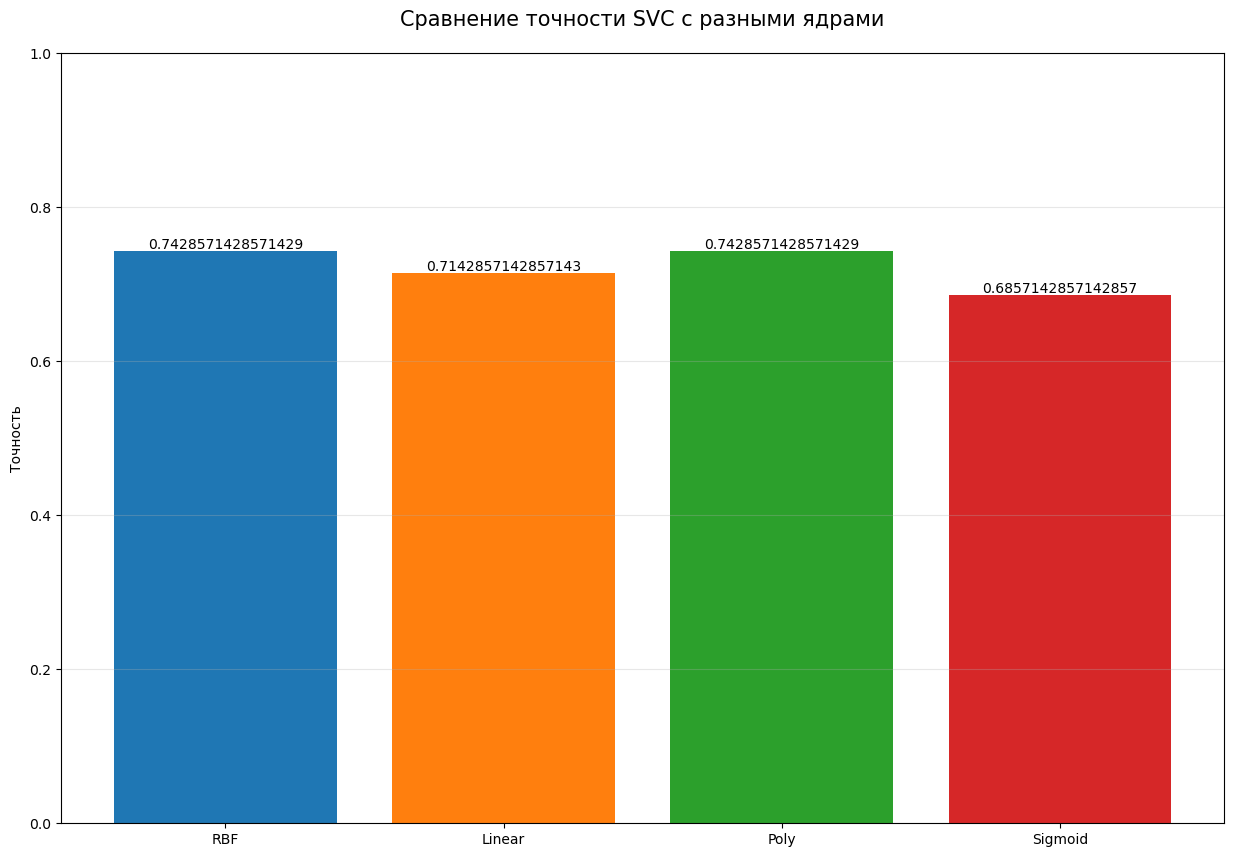

In [739]:
plt.figure(figsize=(15, 10))

bars = plt.bar(kernels, accuracies, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.ylim(0, 1.0)
plt.title('Сравнение точности SVC с разными ядрами', pad=20, fontsize = 15)
plt.ylabel('Точность')
plt.grid(axis='y', linestyle='-', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom')

plt.show()

## 4. Decision tree (Дерево решений)

1. Примените `DecisionTreeClassifier` к масштабированному фрейму данных, используя параметры `max_depth=4`, `random_state=42`.
2. Рассчитайте точность.
3. Попробуйте разные значения `max_depth`.
4. Снова постройте оба графика с границей решений, чтобы увидеть, как работает этот алгоритм.
5. С помощью метода `.plot_tree()` визуализируйте само дерево решений. Это ещё один способ понять, как работает алгоритм.
6. Сколько листьев в визуализированном дереве обозначены как рабочие дни? Напишите свой ответ в ячейке для аннотаций в конце раздела.

In [740]:
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(x_scaled, y)

# Предсказания
y_pred_scaled = tree_model.predict(x_scaled)

# Расчет точности
accuracy_scaled = accuracy_score(y, y_pred_scaled)
print(f'Точность DecisionTree после масштабирования: {accuracy_scaled}')

Точность DecisionTree после масштабирования: 0.9428571428571428


c:\Users\Anna\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


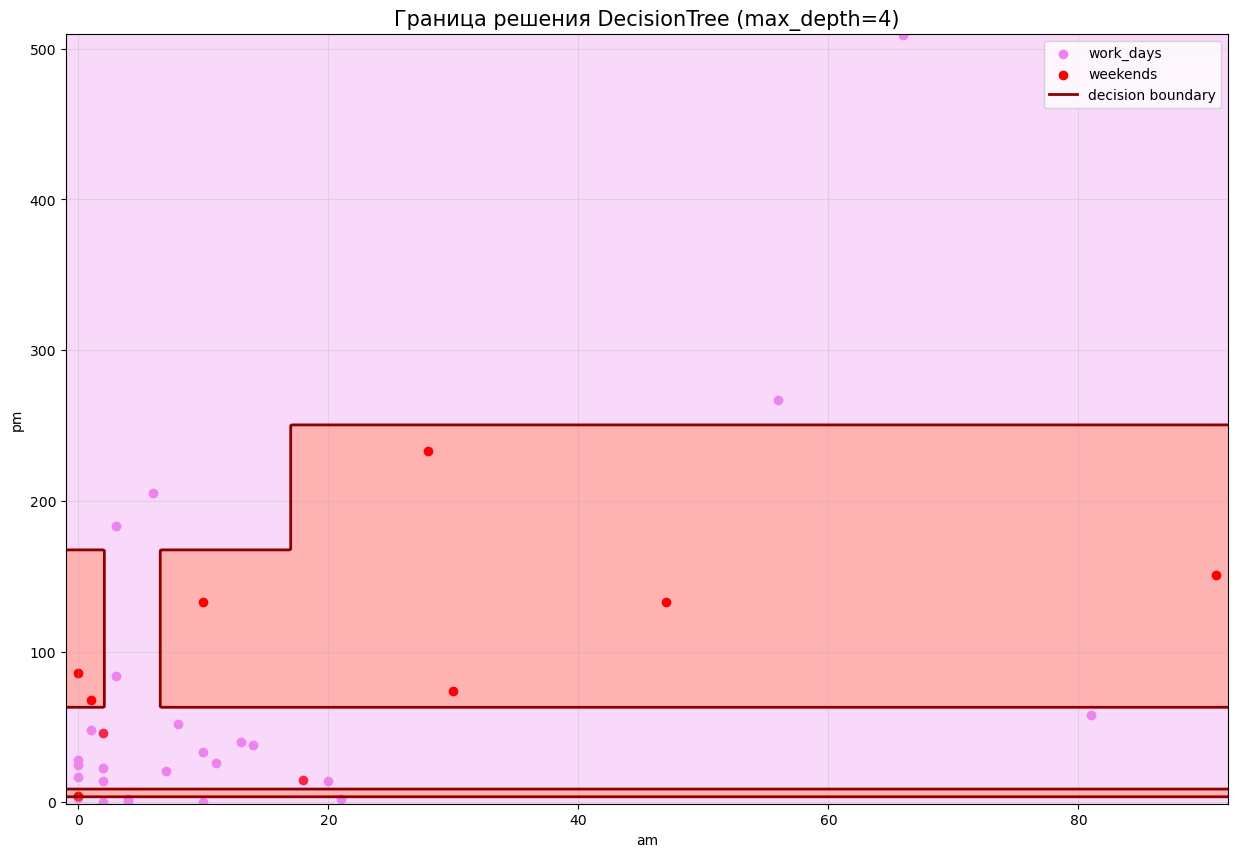

In [741]:
plt.figure(figsize=(15, 10))

work_days = df[df['target'] == 0]
weekends = df[df['target'] == 1]

plt.scatter(work_days['am'], work_days['pm'], color='violet', label='work_days')
plt.scatter(weekends['am'], weekends['pm'], color='red', label='weekends')

x_min, x_max = df['am'].min() - 1, df['am'].max() + 1
y_min, y_max = df['pm'].min() - 1, df['pm'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

grid_scaled = scaler.transform(np.c_[xx.ravel(), yy.ravel()])

z = tree_model.predict(grid_scaled)
z = z.reshape(xx.shape)

plt.contourf(xx, yy, z, alpha=0.3, levels=[-0.5, 0.5, 1.5], colors=['violet', 'red'])
plt.contour(xx, yy, z, colors='darkred', linewidths=2, levels=[0.5])

plt.xlabel('am')
plt.ylabel('pm')
plt.title('Граница решения DecisionTree (max_depth=4)', fontsize=15)
plt.grid(True, alpha=0.3)
plt.plot([], [], color='darkred', linestyle='-', linewidth=2, label='decision boundary')
plt.legend()
plt.show()

c:\Users\Anna\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


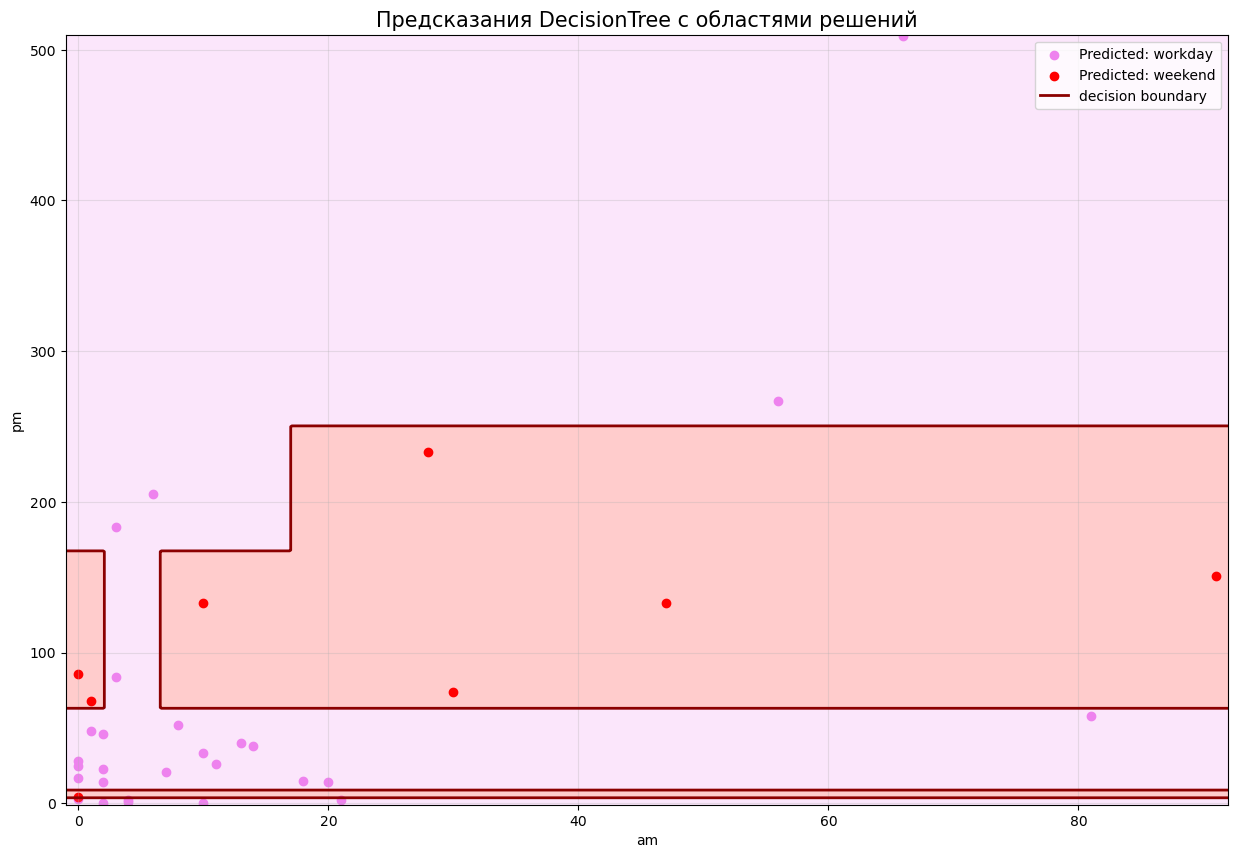

In [742]:
plt.figure(figsize=(15, 10))

df['tree_predict'] = y_pred_scaled
pred_work = df[df['tree_predict'] == 0]
pred_weekend = df[df['tree_predict'] == 1]

plt.scatter(pred_work['am'], pred_work['pm'], color='violet', label='Predicted: workday')
plt.scatter(pred_weekend['am'], pred_weekend['pm'], color='red', label='Predicted: weekend')

x_min, x_max = df['am'].min() - 1, df['am'].max() + 1
y_min, y_max = df['pm'].min() - 1, df['pm'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

grid_scaled = scaler.transform(np.c_[xx.ravel(), yy.ravel()])

z = tree_model.predict(grid_scaled)
z = z.reshape(xx.shape)

# Заливка областей
plt.contourf(xx, yy, z, alpha=0.2, levels=[-0.5, 0.5, 1.5], colors=['violet', 'red'])
plt.contour(xx, yy, z, colors='darkred', linewidths=2, levels=[0.5])

plt.xlabel('am')
plt.ylabel('pm')
plt.title('Предсказания DecisionTree с областями решений', fontsize=15)
plt.grid(True, alpha=0.3)
plt.plot([], [], color='darkred', linestyle='-', linewidth=2, label='decision boundary')
plt.legend()
plt.show()

In [743]:
for depth in range(1, 7):
    temp_tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    temp_tree.fit(x_scaled, y)
    accuracy_scaled = accuracy_score(y, temp_tree.predict(x_scaled))
    print(f'max_depth = {depth}: Точность = {accuracy_scaled}')

max_depth = 1: Точность = 0.7714285714285715
max_depth = 2: Точность = 0.8571428571428571
max_depth = 3: Точность = 0.8857142857142857
max_depth = 4: Точность = 0.9428571428571428
max_depth = 5: Точность = 0.9714285714285714
max_depth = 6: Точность = 1.0


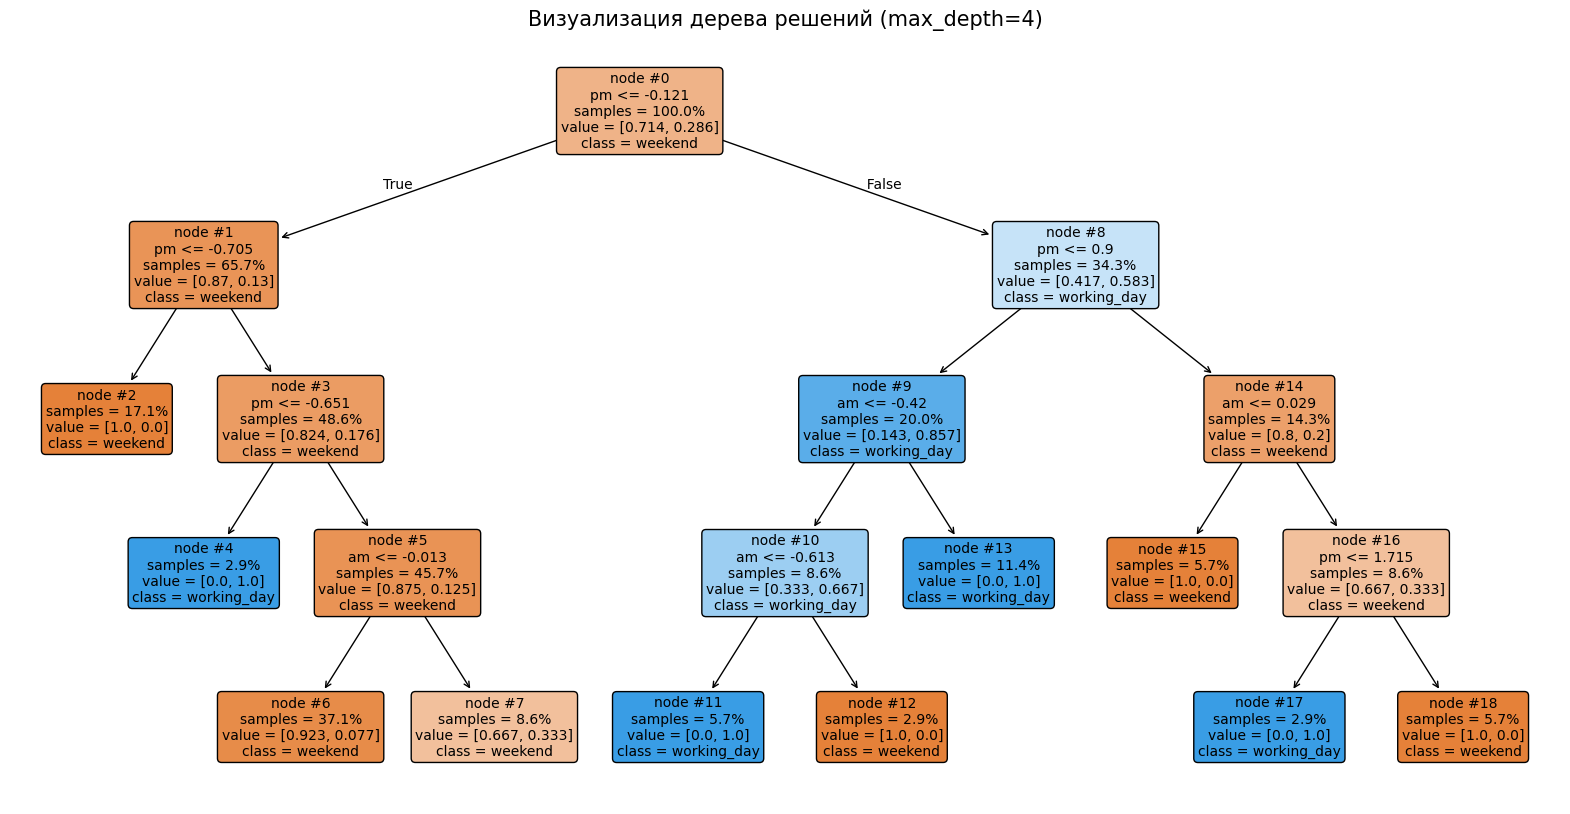

In [744]:
plt.figure(figsize=(20, 10))
plot_tree(
    tree_model,
    feature_names=['am', 'pm'],
    class_names=['weekend','working_day'],
    filled=True,
    rounded=True,
    proportion=True,
    fontsize=10,
    impurity=False,
    node_ids=True,
    max_depth=4
)
plt.title("Визуализация дерева решений (max_depth=4)", fontsize=15)
plt.show()

## Сколько листьев в визуализированном дереве обозначены как рабочие дни?

### Ответ: 4. Это тёмно-синие плашки без ответвлений